In [1]:
from dateutil.parser import parse
from math import floor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/2019/Divvy_Trips_2019_full.csv.gz", compression="gzip")

C:\Users\fpokr\AppData\Local\Temp\ipykernel_16392\672813569.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/2019/Divvy_Trips_2019_full.csv.gz", compression="gzip")


In [3]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


# Как распределены по километражу поездки?
Поскольку считать расстояние проеденное велосипедом по координатам станций неточно (велосипед может проехать не по прямой между станциями), то мы возьмем среднюю скорость велосипедиста и посчитаем расстояние по времени.

In [5]:
df["end_time"] = df["end_time"].apply(lambda x: parse(x))

In [6]:
df["start_time"] = df["start_time"].apply(lambda x: parse(x))

In [7]:
# Получаем продолжительность каждой поездки в минутах
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds().div(60)

In [8]:
# Убираем выбросы - поездки с продолжительностью меньше 0 и больше 12 часов
df = df[df["duration"] > 0]
df = df[df["duration"] < 60 * 12]

In [10]:
# Возьмем среднюю скорость велосипедиста 15 км/ч
df["distance"] = df["duration"] * 15 / 60

In [90]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,duration,distance
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,6.500000,1.625000
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,7.350000,1.837500
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,13.816667,3.454167
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,29.716667,7.429167
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,6.066667,1.516667


In [91]:
# Приводим к числовому типу
df["distance"] = df["distance"].astype(float)

In [92]:
# Убираем выбросы - поездки с километражем больше 20 км
df = df[df["distance"] < 20]

In [93]:
mean = df["distance"].mean()
median = df["distance"].median()
percentile_95 = df["distance"].quantile(0.95)
percentile_5 = df["distance"].quantile(0.05)

In [94]:
mean, median, percentile_95, percentile_5

(3.4955320852622487, 2.75, 8.275, 0.7958333333333333)

Text(0, 0.5, 'Количество поездок')

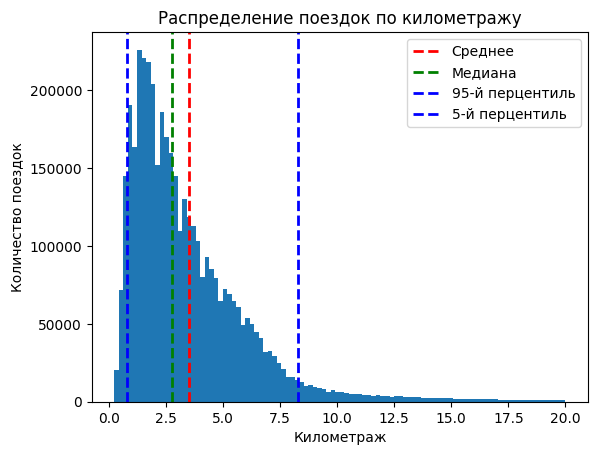

In [95]:
plt.hist(df["distance"], bins=100)
plt.title("Распределение поездок по километражу")
plt.axvline(mean, color="r", linestyle="dashed", linewidth=2, label="Среднее")
plt.axvline(median, color="g", linestyle="dashed", linewidth=2, label="Медиана")
plt.axvline(
    percentile_95, color="b", linestyle="dashed", linewidth=2, label="95-й перцентиль"
)
plt.axvline(
    percentile_5, color="b", linestyle="dashed", linewidth=2, label="5-й перцентиль"
)
plt.legend(loc="best")
plt.xlabel("Километраж")
plt.ylabel("Количество поездок")

# Сколько проезжает один велосипед?

In [ ]:
# Сгруппируем поездки по велосипедам и посчитаем суммарный километраж
grouped_by_bike = df.groupby("bikeid").agg({"distance": "sum"})

In [27]:
grouped_by_bike.head()

,distance
bikeid,
1,2265.362500
2,1573.987500
3,1564.937500
4,1541.462500
5,1826.491667


In [17]:
grouped_by_bike.describe()

,distance
count,6257.000000
mean,2316.141124
std,805.231249
min,28.112500
25%,1871.500000
50%,2424.170833
75%,2867.154167
max,5220.725000


In [18]:
mean = grouped_by_bike["distance"].mean()
median = grouped_by_bike["distance"].median()
percentile_95 = grouped_by_bike["distance"].quantile(0.95)
percentile_5 = grouped_by_bike["distance"].quantile(0.05)

Text(0, 0.5, 'Количество велосипедов')

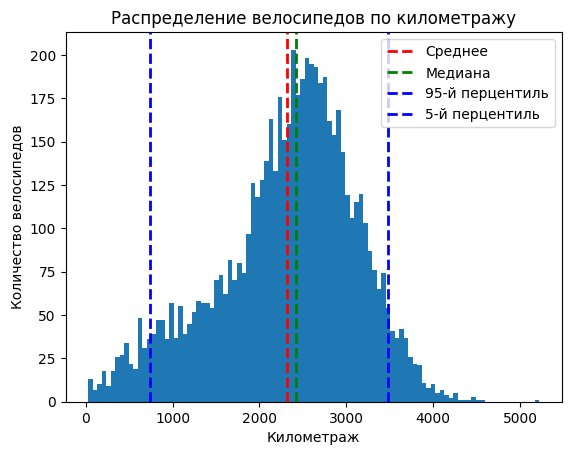

In [19]:
plt.hist(grouped_by_bike["distance"], bins=100)
plt.title("Распределение велосипедов по километражу")
plt.axvline(mean, color="r", linestyle="dashed", linewidth=2, label="Среднее")
plt.axvline(median, color="g", linestyle="dashed", linewidth=2, label="Медиана")
plt.axvline(
    percentile_95, color="b", linestyle="dashed", linewidth=2, label="95-й перцентиль"
)
plt.axvline(
    percentile_5, color="b", linestyle="dashed", linewidth=2, label="5-й перцентиль"
)
plt.legend(loc="best")
plt.xlabel("Километраж")
plt.ylabel("Количество велосипедов")

# Сколько лет активен один велосипед?
Сгруппируем каждый датасет по bikeid и возьмем первую и последнюю поездку. После этого объеденим все датасеты в один и найдем самую первую и самую последнюю поездку для каждого велосипеда => срок жизни велосипеда

In [24]:
grouped_by_bike_2019 = (
    df.groupby("bikeid").agg({"start_time": "min", "end_time": "max"}).reset_index()
)

In [25]:
df_2 = pd.read_csv("data/2018/Divvy_Trips_2018_full.csv.gz", compression="gzip")
grouped_by_bike_2018 = df_2.groupby("01 - Rental Details Bike ID").agg(
    {
        "01 - Rental Details Local Start Time": "min",
        "01 - Rental Details Local End Time": "max",
    }
)
grouped_by_bike_2018 = grouped_by_bike_2018.reset_index()
grouped_by_bike_2018["01 - Rental Details Bike ID"] = grouped_by_bike_2018[
    "01 - Rental Details Bike ID"
].astype(int)
grouped_by_bike_2018 = grouped_by_bike_2018.rename(
    columns={
        "01 - Rental Details Bike ID": "bikeid",
        "01 - Rental Details Local Start Time": "start_time",
        "01 - Rental Details Local End Time": "end_time",
    }
)

C:\Users\fpokr\AppData\Local\Temp\ipykernel_16392\3407659410.py:1: DtypeWarning: Columns (1,2,4,6,8,9,10,13,14,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("data/2018/Divvy_Trips_2018_full.csv.gz", compression="gzip")


In [26]:
df_2 = pd.read_csv("data/2017/Divvy_Trips_2017_full.csv.gz", compression="gzip")
grouped_by_bike_2017 = (
    df_2.groupby("bikeid").agg({"start_time": "min", "end_time": "max"}).reset_index()
)

In [27]:
df_2 = pd.read_csv("data/2016/Divvy_Trips_2016_full.csv.gz", compression="gzip")
grouped_by_bike_2016 = (
    df_2.groupby("bikeid")
    .agg({"starttime": "min", "stoptime": "max"})
    .rename(columns={"starttime": "start_time", "stoptime": "end_time"})
    .reset_index()
)

In [28]:
df_2 = pd.read_csv("data/2015/Divvy_Trips_2015_full.csv.gz", compression="gzip")
grouped_by_bike_2015 = (
    df_2.groupby("bikeid")
    .agg({"starttime": "min", "stoptime": "max"})
    .rename(columns={"starttime": "start_time", "stoptime": "end_time"})
    .reset_index()
)

In [29]:
df_2 = pd.read_csv("data/2014/Divvy_Trips_2014_full.csv.gz", compression="gzip")
grouped_by_bike_2014 = (
    df_2.groupby("bikeid")
    .agg({"starttime": "min", "stoptime": "max"})
    .rename(columns={"starttime": "start_time", "stoptime": "end_time"})
    .reset_index()
)

In [30]:
full_grouped = pd.concat(
    [
        grouped_by_bike_2014,
        grouped_by_bike_2015,
        grouped_by_bike_2016,
        grouped_by_bike_2017,
        grouped_by_bike_2018,
        grouped_by_bike_2019,
    ]
)

In [31]:
full_grouped["start_time"] = pd.to_datetime(full_grouped["start_time"], format="mixed")
full_grouped["end_time"] = pd.to_datetime(full_grouped["end_time"], format="mixed")

In [32]:
full_grouped.head()

,bikeid,start_time,end_time
0,1,2014-01-10 15:02:00,2014-09-09 08:44:00
1,2,2014-10-01 16:28:00,2014-09-09 08:26:00
2,3,2014-01-30 16:59:00,2014-09-30 12:55:00
3,4,2014-01-14 08:00:00,2014-07-09 18:22:00
4,5,2014-10-28 18:01:00,2014-09-09 18:19:00


In [33]:
# Получаем датасет с самой первой и последней поездкой для каждого велосипеда
full_grouped_result = full_grouped.groupby("bikeid").agg(
    {"start_time": "min", "end_time": "max"}
)

In [34]:
# Убираем выбросы - не может быть так, что первая поездка была позже последней
full_grouped_result = full_grouped_result[
    full_grouped_result["start_time"] < full_grouped_result["end_time"]
]

In [35]:
full_grouped_result["years"] = (
    full_grouped_result["end_time"].dt.year - full_grouped_result["start_time"].dt.year
)

Text(0, 0.5, 'Количество велосипедов')

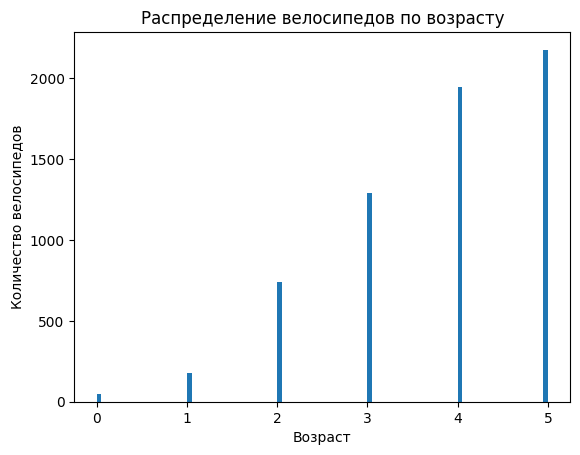

In [36]:
plt.hist(full_grouped_result["years"], bins=100)
plt.title("Распределение велосипедов по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Количество велосипедов")

# Сколько проезжает велосипед за срок службы?

In [11]:
grouped_by_distance_2019 = df.groupby("bikeid").agg({"distance": "sum"})

In [12]:
df_2 = pd.read_csv("data/2018/Divvy_Trips_2018_full.csv.gz", compression="gzip")

df_2["duration"] = (
    (
        pd.to_datetime(df_2["01 - Rental Details Local End Time"], format="mixed")
        - pd.to_datetime(df_2["01 - Rental Details Local Start Time"], format="mixed")
    )
    .dt.total_seconds()
    .div(60)
)

df_2 = df_2[df_2["duration"] < 60 * 12]

df_2["distance"] = df_2["duration"] * 15 / 60

grouped_by_distance_2018 = (
    df_2.groupby("01 - Rental Details Bike ID").agg({"distance": "sum"}).reset_index()
)

grouped_by_distance_2018.rename(
    columns={"01 - Rental Details Bike ID": "bikeid"}, inplace=True
)

C:\Users\fpokr\AppData\Local\Temp\ipykernel_16392\3141766867.py:1: DtypeWarning: Columns (1,2,4,6,8,9,10,13,14,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("data/2018/Divvy_Trips_2018_full.csv.gz", compression="gzip")


In [14]:
df_2 = pd.read_csv("data/2017/Divvy_Trips_2017_full.csv.gz", compression="gzip")

df_2["distance"] = df_2["tripduration"] * 15 / 3600

df_2 = df_2[df_2["tripduration"] < 60 * 60 * 12]

grouped_by_distance_2017 = df_2.groupby("bikeid").agg({"distance": "sum"}).reset_index()

In [15]:
df_2 = pd.read_csv("data/2016/Divvy_Trips_2016_full.csv.gz", compression="gzip")

df_2["distance"] = df_2["tripduration"] * 15 / 3600

df_2 = df_2[df_2["tripduration"] < 60 * 60 * 12]

grouped_by_distance_2016 = df_2.groupby("bikeid").agg({"distance": "sum"}).reset_index()

In [16]:
df_2 = pd.read_csv("data/2015/Divvy_Trips_2015_full.csv.gz", compression="gzip")

df_2["distance"] = df_2["tripduration"] * 15 / 3600

df_2 = df_2[df_2["tripduration"] < 60 * 60 * 12]

grouped_by_distance_2015 = df_2.groupby("bikeid").agg({"distance": "sum"}).reset_index()

In [17]:
df_2 = pd.read_csv("data/2014/Divvy_Trips_2014_full.csv.gz", compression="gzip")

df_2["distance"] = df_2["tripduration"] * 15 / 3600

df_2 = df_2[df_2["tripduration"] < 60 * 60 * 12]

grouped_by_distance_2014 = df_2.groupby("bikeid").agg({"distance": "sum"}).reset_index()

In [18]:
full_grouped_distance = pd.concat(
    [
        grouped_by_distance_2014,
        grouped_by_distance_2015,
        grouped_by_distance_2016,
        grouped_by_distance_2017,
        grouped_by_distance_2018,
        grouped_by_distance_2019,
    ]
)

full_grouped_distance.dropna(subset="bikeid", inplace=True)

full_grouped_distance["bikeid"] = full_grouped_distance["bikeid"].astype(int)

In [19]:
full_grouped_distance = (
    full_grouped_distance.groupby("bikeid").agg({"distance": "sum"}).reset_index()
)

In [20]:
full_grouped_distance = full_grouped_distance[full_grouped_distance["distance"] < 16000]

In [21]:
median = full_grouped_distance["distance"].median()
mean = full_grouped_distance["distance"].mean()
percentile_5 = full_grouped_distance["distance"].quantile(0.05)
percentile_95 = full_grouped_distance["distance"].quantile(0.95)

In [22]:
median, mean, percentile_5, percentile_95

(9179.0875, 8624.444853941104, 2592.7850000000003, 12993.3975)

Text(0, 0.5, 'Количество велосипедов')

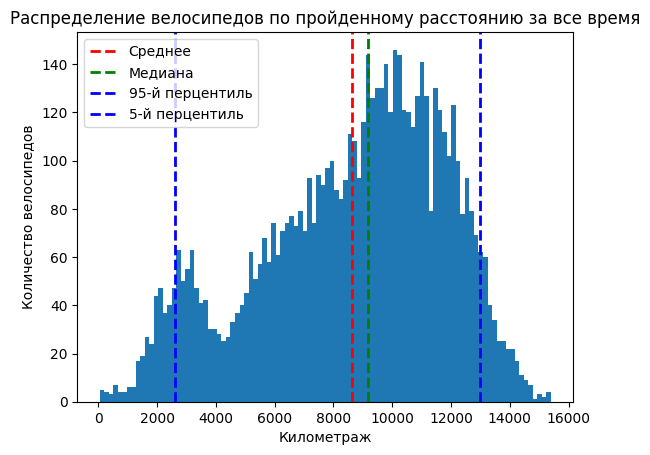

In [23]:
plt.hist(full_grouped_distance["distance"], bins=100)
plt.title("Распределение велосипедов по пройденному расстоянию за все время")
plt.axvline(mean, color="r", linestyle="dashed", linewidth=2, label="Среднее")
plt.axvline(median, color="g", linestyle="dashed", linewidth=2, label="Медиана")
plt.axvline(
    percentile_95, color="b", linestyle="dashed", linewidth=2, label="95-й перцентиль"
)
plt.axvline(
    percentile_5, color="b", linestyle="dashed", linewidth=2, label="5-й перцентиль"
)
plt.legend(loc="best")
plt.xlabel("Километраж")
plt.ylabel("Количество велосипедов")

# Сколько нужно потратить на ремонт?

In [52]:
full_grouped_distance["tech"] = full_grouped_distance["distance"] / 4000

In [53]:
full_grouped_distance["tech"] = full_grouped_distance["tech"].apply(lambda x: floor(x))

In [54]:
# В цену входят
# тормозные колодки
# Кассета и её система
# цепь
# вилка
# рулевая колонка
price = (880 + 400 + 400 + 2200 + 1800 + 600) / 81.99

In [55]:
full_grouped_distance["price"] = full_grouped_distance["tech"] * price

In [57]:
round(full_grouped_distance["price"].sum())

802636